In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

### Read data by pandas


In [2]:
df = pd.read_csv('uber.csv' , na_values=['0.00'])

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        199995 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   196214 non-null  float64
 5   pickup_latitude    196218 non-null  float64
 6   dropoff_longitude  196235 non-null  float64
 7   dropoff_latitude   196241 non-null  float64
 8   passenger_count    199291 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.7+ MB


### Check missing Value

In [5]:
df.isna().sum()

Unnamed: 0              0
key                     0
fare_amount             5
pickup_datetime         0
pickup_longitude     3786
pickup_latitude      3782
dropoff_longitude    3765
dropoff_latitude     3759
passenger_count       709
dtype: int64

In [6]:
df.dropna(axis=0 , inplace=True)

### Check duplicated

In [7]:
df.duplicated().sum()

0

### Univariate analysis

In [8]:
df['pickup_longitude'].unique()

array([-73.99981689, -73.994355  , -74.005043  , ..., -73.969204  ,
       -74.003548  , -73.99712372])

In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.953420e+05,195342.000000,195342.000000,195342.000000,195342.000000,195342.000000,195342.000000
mean,2.771568e+07,11.350196,-73.929892,40.705428,-73.916906,40.688365,1.691152
std,1.600942e+07,9.808223,5.458969,5.436405,8.533219,4.001301,1.386991
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,1.383389e+07,6.000000,-73.992268,40.736392,-73.991592,40.735266,1.000000
50%,2.776122e+07,8.500000,-73.982102,40.753277,-73.980523,40.753724,1.000000
75%,4.154783e+07,12.500000,-73.968317,40.767540,-73.965317,40.768320,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.drop(['key', 'Unnamed: 0'],axis = 1, inplace=True)

In [11]:
df['passenger_count'].value_counts()

1.0      135642
2.0       28865
5.0       13741
3.0        8708
6.0        4202
4.0        4183
208.0         1
Name: passenger_count, dtype: int64

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0


###  Fix pickup_datetime column

In [13]:
df['pickup_datetime']

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 195342, dtype: object

In [14]:
df['pickup_datetime'][0][0:19]

'2015-05-07 19:52:06'

In [15]:
def fix_date(x) :
    return x[0:19]

In [16]:
df['pickup_datetime']=df['pickup_datetime'].apply(fix_date)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1.0


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format ='%Y-%m-%d %H:%M:%S')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195342 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fare_amount        195342 non-null  float64       
 1   pickup_datetime    195342 non-null  datetime64[ns]
 2   pickup_longitude   195342 non-null  float64       
 3   pickup_latitude    195342 non-null  float64       
 4   dropoff_longitude  195342 non-null  float64       
 5   dropoff_latitude   195342 non-null  float64       
 6   passenger_count    195342 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.0 MB


# Geocoding features to get the address from lat, long 

In [19]:
from geopy.distance import great_circle


In [20]:
def det_kilometres (x) :
    loc1 = (x['pickup_latitude'] , x['pickup_longitude'])
    loc2 = (x['dropoff_latitude'],x['dropoff_longitude'])
    return great_circle(loc1,loc2).kilometers

In [21]:
x = (df['pickup_latitude'][1] , df['pickup_longitude'][1])
y = (df['dropoff_latitude'][1],df['dropoff_longitude'][1])
great_circle(x,y).kilometers

2.4575933554966425

In [22]:
df[ df['pickup_latitude'] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
56617,8.1,2012-03-11 07:24:00,-73.960828,404.433332,-73.988357,40.769037,1.0
61793,8.5,2012-06-13 05:45:00,-73.951385,401.066667,-73.982110,40.754117,1.0
75851,15.7,2011-11-05 00:22:00,-1340.648410,1644.421482,-3356.666300,872.697628,1.0
91422,16.1,2011-05-18 13:24:00,57.418457,1292.016128,1153.572603,-881.985513,1.0


In [23]:
df[ df['pickup_latitude'] < -90] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [24]:
df.drop([56617 ,61793,75851,91422] , axis=0 , inplace=True)

In [25]:
df[ df['dropoff_latitude'] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
139447,13.7,2012-01-20 11:50:00,-74.011042,40.70978,-73.983163,493.533332,4.0


In [26]:
df.drop([139447] , axis=0 , inplace=True)

In [27]:
df[ df['dropoff_latitude'] < -90] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [28]:
df['kilo_meters'] = df.apply(det_kilometres , axis=1)

In [29]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210
199996,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875053
199997,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2.0,12.850337
199998,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539720


In [30]:
df['passenger_count'].value_counts()

1.0      135638
2.0       28865
5.0       13741
3.0        8708
6.0        4202
4.0        4182
208.0         1
Name: passenger_count, dtype: int64

In [31]:
df[df['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters
113038,11.7,2010-12-28 08:20:00,-73.937795,40.758498,-73.937835,40.758415,208.0,0.009825


In [32]:
df.drop([113038] , axis = 0 , inplace=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

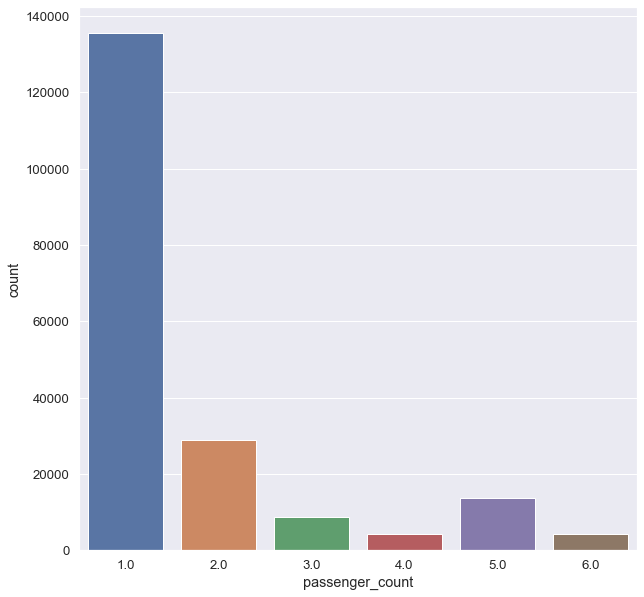

In [33]:
sns.countplot(data = df , x = 'passenger_count' )

In [34]:
df['HOUR'] = df['pickup_datetime'].dt.hour
df['MONTH'] =df['pickup_datetime'].dt.month_name()
df['DAY'] = df['pickup_datetime'].dt.day_name()

In [35]:
df.drop(['pickup_datetime'], inplace = True , axis = 1)

In [36]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325,19,May,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593,20,July,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384,21,August,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686,8,June,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475456,17,August,Thursday
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210,10,October,Sunday
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875053,1,March,Friday
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,12.850337,0,June,Monday
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539720,14,May,Wednesday


In [37]:
df['HOUR'].value_counts().idxmax()

19

<AxesSubplot:xlabel='HOUR', ylabel='count'>

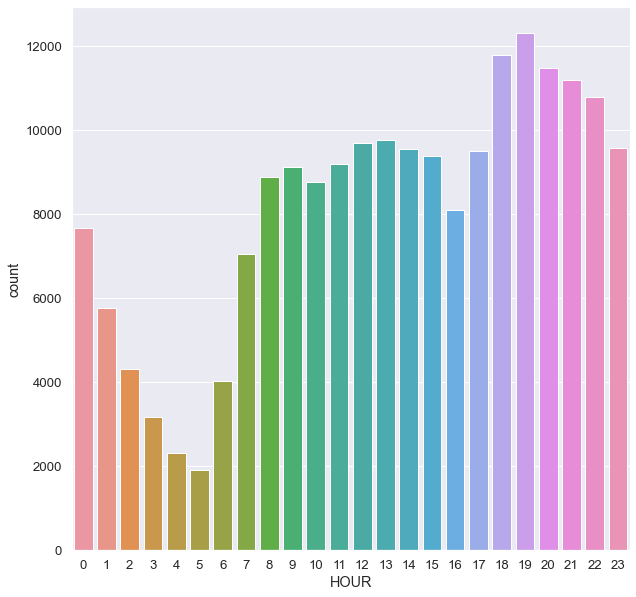

In [38]:
sns.countplot(data = df , x = 'HOUR' )

In [39]:
df['MONTH'].value_counts().idxmax()



'May'

In [40]:
df['MONTH'].value_counts()

May          18433
March        18305
April        18129
June         17391
January      17268
February     16288
October      15862
December     15156
November     14982
September    14927
July         14760
August       13835
Name: MONTH, dtype: int64

<AxesSubplot:xlabel='MONTH', ylabel='count'>

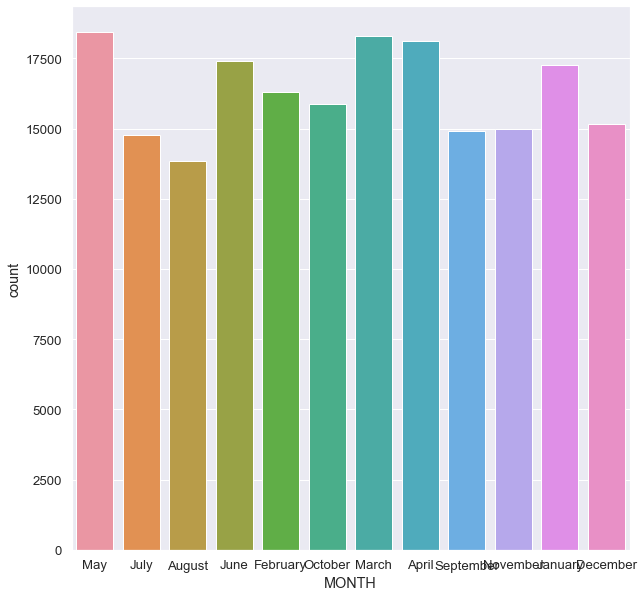

In [41]:
sns.countplot(data = df , x = 'MONTH' )

In [42]:
df['DAY'].value_counts().idxmax()

'Friday'

<AxesSubplot:xlabel='DAY', ylabel='count'>

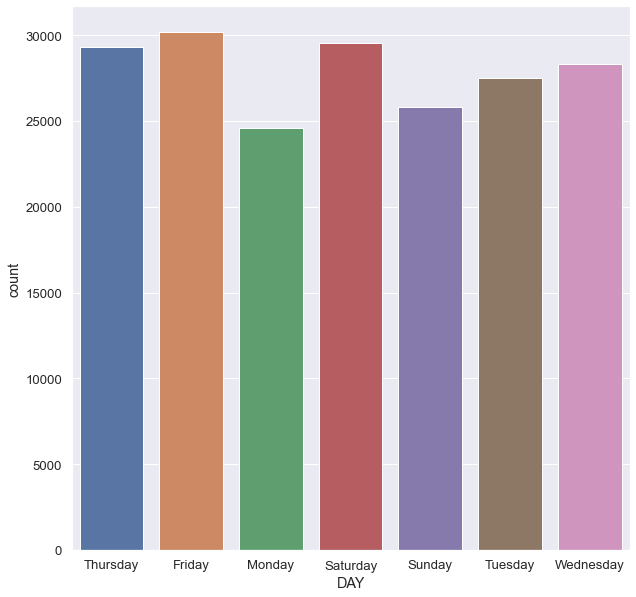

In [43]:
sns.countplot(data = df , x = 'DAY' )

In [44]:
df['DAY'].value_counts()

Friday       30177
Saturday     29566
Thursday     29339
Wednesday    28314
Tuesday      27483
Sunday       25838
Monday       24619
Name: DAY, dtype: int64

In [45]:
df['fare_amount'].describe()

count    195336.000000
mean         11.350167
std           9.808356
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [46]:
df[df['fare_amount']<0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1.0,0.325307,23,March,Tuesday
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2.0,0.500647,21,February,Thursday
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1.0,0.383918,14,May,Friday
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5.0,0.019203,8,March,Tuesday
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3.0,8.171308,8,March,Friday
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5.0,0.450055,21,March,Friday
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1.0,1.997246,20,March,Tuesday
139272,-6.90,-73.988727,40.736445,-73.977622,40.750487,1.0,1.820227,18,February,Tuesday
148803,-5.70,-73.977300,40.742783,-73.988837,40.747465,3.0,1.102573,10,February,Friday
150301,-3.00,-74.004646,40.707355,-74.004013,40.707699,1.0,0.065624,7,June,Thursday


In [47]:
df.drop([63395,71246,79903,89322,92063,98875,104080,139272,148803, 150301,151681,157412,164056,179111,180444,190925] , axis = 0 , inplace=True)

In [48]:
df[df['fare_amount']<0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY


<AxesSubplot:xlabel='fare_amount'>

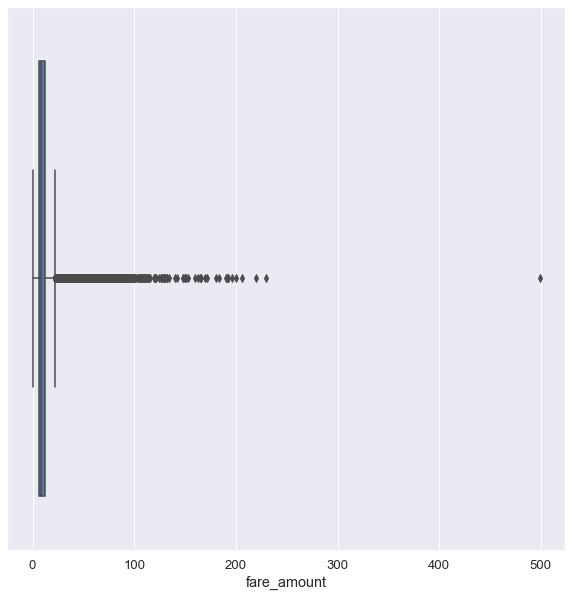

In [49]:
sns.boxplot(data = df , x='fare_amount')

In [50]:
from datasist.structdata import detect_outliers

In [51]:
outliers_indices = detect_outliers(df , 0 , ['fare_amount'])
len (outliers_indices)

16741

In [52]:
df.drop(outliers_indices , inplace= True)

In [53]:
outliers_indices2 = detect_outliers(df , 0 , ['passenger_count'])
len (outliers_indices2)

20163

In [54]:
df.drop(outliers_indices2 , inplace= True)

<AxesSubplot:xlabel='fare_amount'>

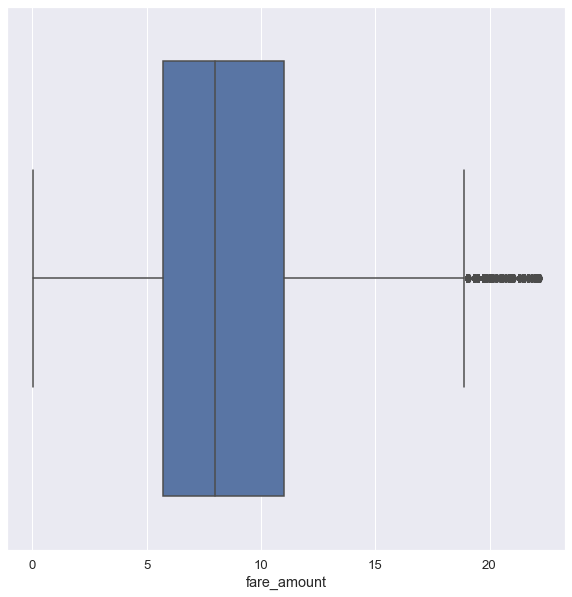

In [55]:
sns.boxplot(data = df , x='fare_amount')

In [56]:
df['kilo_meters'].describe()

count    158416.000000
mean          3.764551
std          81.857367
min           0.000000
25%           1.198533
50%           1.990772
75%           3.306525
max        8667.705423
Name: kilo_meters, dtype: float64

<AxesSubplot:xlabel='kilo_meters'>

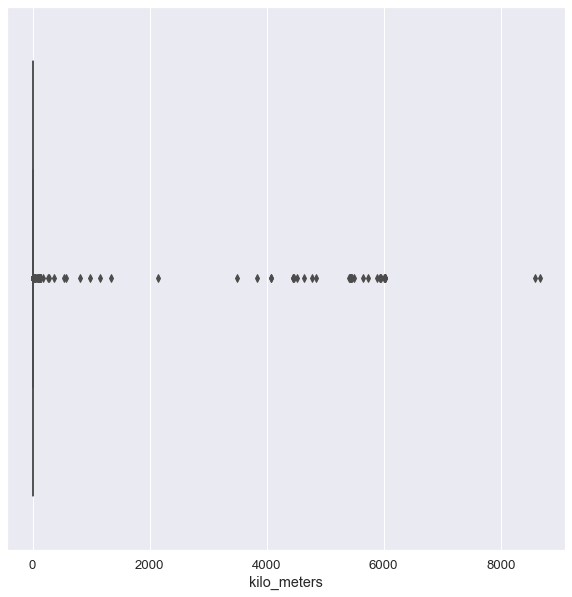

In [57]:
sns.boxplot(data = df , x='kilo_meters')

In [58]:
df[df['kilo_meters']>2000]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY
1945,7.0,-0.131667,40.757063,-73.991593,40.749953,1.0,6021.122795,16,February,Sunday
2167,5.7,-1.216667,40.748597,-74.004822,40.734670,1.0,5941.068194,12,July,Saturday
4949,4.9,-748.016667,40.739957,-74.003570,40.734192,1.0,3828.765626,0,April,Saturday
6594,9.3,-1.866667,40.765987,-73.972280,40.793807,1.0,5885.536926,19,June,Tuesday
17926,5.3,-73.962162,40.763307,-4.933332,40.774010,1.0,5651.404503,11,February,Saturday
19846,10.5,-74.005492,40.738877,-73.967477,0.760607,3.0,4445.388733,11,September,Sunday
32549,15.7,-74.016055,40.715155,-737.916665,40.697862,2.0,4644.274242,10,June,Saturday
36390,5.3,-7.690000,40.713002,-73.997342,40.723965,1.0,5445.829910,15,March,Tuesday
36780,5.7,-7.583332,40.768540,-73.974525,40.757332,2.0,5448.448068,11,March,Wednesday
40908,8.1,-93.824668,43.486656,-54.294363,35.174169,1.0,3487.798706,19,July,Thursday


# compare kilometers with fare amount , i think data is wrong so we will delete outliers

In [59]:
outliers_indices1 = detect_outliers(df , 0 , ['kilo_meters'])
len (outliers_indices1)

7064

In [60]:
df.drop(outliers_indices1 , inplace= True)

<AxesSubplot:xlabel='kilo_meters'>

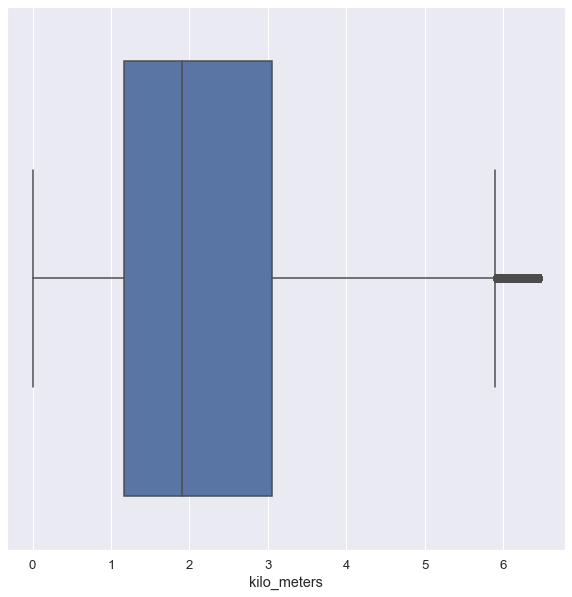

In [61]:
sns.boxplot(data = df , x='kilo_meters')

In [62]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325,19,May,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593,20,July,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384,21,August,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686,8,June,Friday
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,2,February,Saturday
...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1.0,1.122879,14,January,Friday
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210,10,October,Sunday
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875053,1,March,Friday
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539720,14,May,Wednesday


In [63]:
value_0 = df[df['kilo_meters'] == 0]
len(value_0)

1611

In [64]:
df['kilo_meters'].mean()

2.261719668798268

In [65]:
def replace_0_to_nan(x):
    if x == 0 :
        return 2.2626911772248626
    else:
        return x 
    

In [66]:
df['kilo_meters'] = df['kilo_meters'].apply(replace_0_to_nan)

In [67]:
value_0 = df[df['kilo_meters'] == 0]
len(value_0)

0

In [68]:
df['kilo_meters'].describe()

count    151352.000000
mean          2.285804
std           1.416484
min           0.000084
25%           1.195485
50%           1.947851
75%           3.059477
max           6.468454
Name: kilo_meters, dtype: float64

<AxesSubplot:>

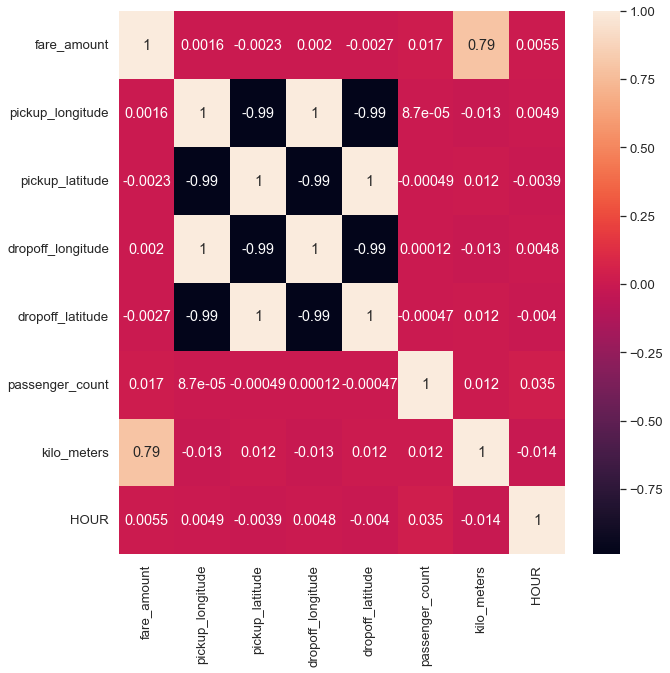

In [69]:
sns.heatmap(df.corr(),annot=True)

In [70]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR
fare_amount,1.000000,0.001582,-0.002295,0.002029,-0.002681,0.016806,0.790512,0.005499
pickup_longitude,0.001582,1.000000,-0.989877,0.999973,-0.989884,0.000087,-0.013331,0.004948
pickup_latitude,-0.002295,-0.989877,1.000000,-0.989891,0.999964,-0.000489,0.011684,-0.003945
dropoff_longitude,0.002029,0.999973,-0.989891,1.000000,-0.989867,0.000119,-0.012622,0.004786
dropoff_latitude,-0.002681,-0.989884,0.999964,-0.989867,1.000000,-0.000472,0.011671,-0.003960
passenger_count,0.016806,0.000087,-0.000489,0.000119,-0.000472,1.000000,0.012059,0.034578
kilo_meters,0.790512,-0.013331,0.011684,-0.012622,0.011671,0.012059,1.000000,-0.014381
HOUR,0.005499,0.004948,-0.003945,0.004786,-0.003960,0.034578,-0.014381,1.000000


In [71]:
X = df.drop(['fare_amount', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
y = df['fare_amount']

In [72]:
X

,passenger_count,kilo_meters,HOUR,MONTH,DAY
0,1.0,1.683325,19,May,Thursday
1,1.0,2.457593,20,July,Friday
2,1.0,5.036384,21,August,Monday
3,3.0,1.661686,8,June,Friday
5,1.0,2.262691,2,February,Saturday
...,...,...,...,...,...
199994,1.0,1.122879,14,January,Friday
199995,1.0,0.112210,10,October,Sunday
199996,1.0,1.875053,1,March,Friday
199998,1.0,3.539720,14,May,Wednesday


In [73]:
X = pd.get_dummies(X,drop_first = 0)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print('training R2',lr.score(x_train_scaled,y_train))
print('test R2',lr.score(x_test_scaled,y_test))
print('root men squared error : ',mean_squared_error(y_test,y_pred))


training R2 0.6290097551821092
test R2 0.6312157609195158
root men squared error :  5.064156483518394


In [77]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)
print('training R2',dt.score(x_train_scaled,y_train))
print('test R2',dt.score(x_test_scaled,y_test))
print('root men squared error : ',mean_squared_error(y_test,y_pred))

training R2 0.6270877702429702
test R2 0.628760786616172
root men squared error :  5.097868265958305


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=8)
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('training R2',rf.score(x_train_scaled,y_train))
print('test R2',rf.score(x_test_scaled,y_test))
print('root men squared error : ',mean_squared_error(y_test,y_pred))

training R2 0.6556230226795123
test R2 0.6508916956416135
root men squared error :  4.793965944354789


In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold =KFold(n_splits=10)
scores = cross_validate(rf,x_train_scaled,y_train,cv=kfold)

In [80]:
scores

{'fit_time': array([43.17869925, 43.15377092, 42.11603642, 41.66514754, 41.64619517,
        42.99881434, 41.9080925 , 41.9880662 , 41.77309513, 41.55420589]),
 'score_time': array([0.14494896, 0.15096354, 0.14496922, 0.15296507, 0.14296651,
        0.14598346, 0.14594436, 0.14892817, 0.14396358, 0.14198709]),
 'test_score': array([0.64376406, 0.64260926, 0.64239627, 0.65034826, 0.63991396,
        0.63498036, 0.64294534, 0.65855485, 0.66970934, 0.63365122])}

from sklearn.model_selection import GridSearchCV
parm= {'n_estimators':[100,200,300,400,555],'max_depth':[6,8,10,12]}
grid = GridSearchCV(rf,param_grid=parm,cv=10)
grid.fit(x_train_scaled,y_train)


In [82]:
X = df.drop(['fare_amount', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
y = df['fare_amount']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

In [84]:
numeric_column = x_train.select_dtypes(exclude='object').columns

In [85]:
cat_column = x_train.select_dtypes(include='object').columns

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('scaler',StandardScaler(with_mean=False))])

In [87]:
cat_transformer = Pipeline([('encode',OneHotEncoder()),
                            ('scaler',StandardScaler(with_mean=False))])

In [88]:
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_column),
                                             ('cat',cat_transformer,cat_column)])

In [89]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['passenger_count', 'kilo_meters', 'HOUR'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encode', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['MONTH', 'DAY'], dtype='object'))])

In [90]:
pipe = Pipeline([('preprocc',preprocess),
                 ('model',RandomForestRegressor(max_depth= 5, n_estimators= 300))])

In [91]:
pipe

Pipeline(steps=[('preprocc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['passenger_count', 'kilo_meters', 'HOUR'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MONTH', 'DAY'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=300))])

In [92]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['passenger_count', 'kilo_meters', 'HOUR'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MONTH', 'DAY'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=300))])

In [93]:
import joblib 
joblib.dump(pipe,'model.pkl')

['model.pkl']

In [94]:
model = joblib.load('model.pkl')

In [95]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilo_meters,HOUR,MONTH,DAY
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325,19,May,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593,20,July,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384,21,August,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686,8,June,Friday
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,2.262691,2,February,Saturday
...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1.0,1.122879,14,January,Friday
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210,10,October,Sunday
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875053,1,March,Friday
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539720,14,May,Wednesday


In [96]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

regressor=joblib.load('model.pkl')


def welcome():
    return "Welcome All"


def predict_price(passenger_count,kilo_meters,HOUR,MONTH,DAY):
  prediction=regressor.predict(pd.DataFrame({'passenger_count':[passenger_count],'kilo_meters':[kilo_meters],'HOUR':[HOUR],'MONTH':[MONTH],'DAY':[DAY]}))
  print(prediction)
  return  prediction
def main():
    st.title("Uber rate amount predection")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Uber rate amount predection App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    passenger_count = st.text_input("passenger_count","Type Here")
    kilo_meters = st.text_input("kilo_meters","Type Here")
    HOUR = st.text_input("HOUR","Type Here")
    MONTH = st.text_input("MONTH","Type Here")
    DAY = st.text_input("DAY","Type Here")
    result=""
    if st.button("Predict"):
        result=predict_price(passenger_count,kilo_meters, HOUR, MONTH,DAY)
    st.success('The rate is {} USD'.format(result))
    if st.button("About"):
        st.text("our app using streamlit")
        st.text("best of luck in your GP")
if __name__=='__main__':
    main()        


Overwriting app.py


In [ ]:
!streamlit run app.py